In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import medfilt
from scipy.ndimage import gaussian_filter

In [10]:
def d_arg(image_in, sz=1):
#     image_filt = gaussian_filter(image_in, sigma=sz)
#     image_filt = medfilt(image_in, kernel_size=sz)
    
    d_arg = np.zeros(image_in.shape)
    for i in range(4):
        
        # Rotate image in 90 deg increments, compute angle of gradient
        image_rot = np.rot90(image_in, i)
        grad_x,grad_y = np.gradient(image_rot)
        theta = np.arctan2(grad_y, grad_x)
        
        theta = gaussian_filter(theta, sigma=sz)
        
        # Compute change of angle of gradient in y direction (\alpha_{arg}, y_arg in direction 90*i)
        theta_grad_y = np.gradient(theta, axis=1)
        
        # Rotate back and add to total (accumulate darg)
        d_arg += np.rot90(theta_grad_y, -i)
    
        d_arg_2 = np.square(d_arg);
        d_arg_final = d_arg_2 / np.amax(d_arg_2) * 255
    
    return d_arg_final

<Figure size 432x288 with 0 Axes>

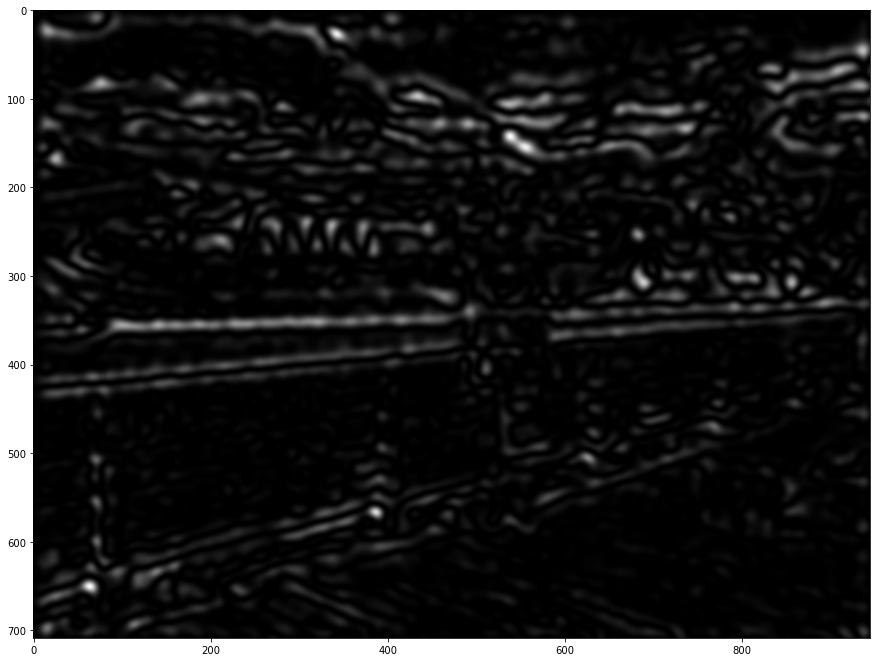

In [11]:
if __name__ == '__main__':
    # Load image
    plt.clf()
    image = cv2.imread("../Images/Images_from_Liu_Bolin_s_site/Liu10.PNG")
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Normalized paraboloid, for testing
#     x = np.arange(-100, 101)
#     X, Y = np.meshgrid(x, x);
#     Z = 2*np.square(X) + np.square(Y);
#     grayscale = Z / np.amax(Z);

    # Call method and show image
    image_out = d_arg(grayscale, 7)
    image_final = cv2.cvtColor(image_out.astype('uint8'), cv2.COLOR_GRAY2RGB)
    plt.figure(figsize=(15,15))
    plt.imshow(image_final)
    plt.show()